This notebook is for plotting all (hopefully) figures

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn.model_selection import train_test_split

### Plotting  data distribution

In [9]:
ft = 'ecfp'

Random Splitting

In [10]:
train_data = pd.read_pickle("./data/ft_train_random.pkl")
test_data = pd.read_pickle("./data/ft_test_random.pkl")

train = np.stack(train_data[ft]).astype(float)
test = np.stack(test_data[ft]).astype(float)

In [11]:
pca1, pca2 = decomposition.PCA(n_components=2, random_state=7), decomposition.PCA(n_components=2, random_state=7)
pca1.fit(train)
pca2.fit(test)
train = pca1.transform(train)
test = pca2.transform(test)

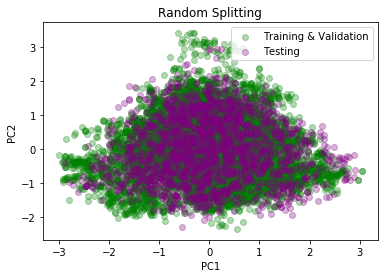

In [12]:
plt.scatter(train[:, 0], train[:, 1], c='green', label='Training & Validation', alpha=0.3)
plt.scatter(test[:, 0], test[:, 1], c='purple', label='Testing', alpha=0.3)
plt.legend()
plt.title("Random Splitting")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig("./figures/PCA_%s_random_splitting.png" %ft)

Scaffold splitting

In [13]:
train_data = pd.read_pickle("./data/ft_train_scaffold.pkl")
test_data = pd.read_pickle("./data/ft_test_scaffold.pkl")

train = np.stack(train_data[ft]).astype(float)
test = np.stack(test_data[ft]).astype(float)

In [14]:
pca1, pca2 = decomposition.PCA(n_components=2, random_state=7), decomposition.PCA(n_components=2, random_state=7)
pca1.fit(train)
pca2.fit(test)
train = pca1.transform(train)
test = pca2.transform(test)

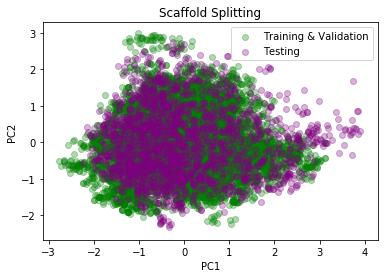

In [15]:
plt.scatter(train[:, 0], train[:, 1], c='green', label='Training & Validation', alpha=0.3)
plt.scatter(test[:, 0], test[:, 1], c='purple', label='Testing', alpha=0.3)
plt.legend()
plt.title("Scaffold Splitting")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig("./figures/PCA_%s_scaffold_splitting.png" %ft)

In [ ]:
# active_idx = train_data.loc[train_data['agrochemical']==0].index
# intermediate_idx = train_data.loc[train_data['agrochemical']==1].index
# inactive_idx = train_data.loc[train_data['agrochemical']==2].index

# active = x_train[active_idx]
# intermediate = x_train[intermediate_idx]
# inactive = x_train[inactive_idx]

# plt.scatter(inactive[:, 0], inactive[:, 1], c='green', label='inactive', alpha=0.3)
# plt.scatter(intermediate[:, 0], intermediate[:, 1], c='blue', label='intermediate', alpha=0.3)
# plt.scatter(active[:, 0], active[:, 1], c='purple', label='active', alpha=0.3)
# plt.legend()

### Plotting accuracy and loss per epochs

In [4]:
def plot_acc_loss_per_epochs(train_acc, train_loss, val_acc, val_loss):
    import matplotlib.pyplot as plt
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    epochs = np.arange(len(train_acc))

    ax1.set_title("Accuracy")
    ax1.plot(epochs, train_acc, label='Training', c='r', marker='.')
    ax1.plot(epochs, val_acc, label='Validation', c='b', marker='.')
    ax2.set_title("Loss")
    ax2.plot(epochs, train_loss, label="Training", c='r', marker='.')
    ax2.plot(epochs, val_loss, label="Validation", c='b', marker='.')
    ax1.legend()
    ax2.legend()
    ax1.set_xlabel("Epochs")
    ax2.set_xlabel("Epochs")
    ax1.set_ylabel("Accuracy")
    ax2.set_ylabel("Loss")
    fig.subplots_adjust(wspace=0.2)
    fig.set_size_inches((10, 5))

ECFP - L1 regularizer & batch size 16 & lr=0.0001 
(`./saved_model/NN_training_history/ecfp/l1/batchsize16/5e-05_epochs50_dropout0.3_lr0.0001_random_2.h`)

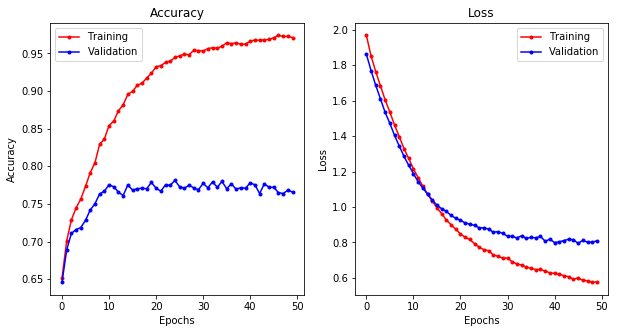

In [5]:
train_acc = [0.6511702986279257, 0.7008878127522196, 0.7286521388216304, 0.7447941888619855, 0.7564164648910412, 0.773365617433414, 0.7914447134786118, 0.8045197740112995, 0.8292171105730428, 0.8361581920903954, 0.8540758676351897, 0.8600484261501211, 0.8737691686844229, 0.881678773204197, 0.8957223567393059, 0.8995964487489911, 0.9076674737691687, 0.910411622276029, 0.9171912832929782, 0.9236481033091203, 0.932364810330912, 0.9336561743341404, 0.9381759483454398, 0.9396287328490718, 0.9446327683615819, 0.9467312348668281, 0.9491525423728814, 0.94818401937046, 0.9541565778853914, 0.9538337368845844, 0.9530266343825666, 0.9564164648910412, 0.9575464083938661, 0.9569007263922518, 0.9594834543987086, 0.9641646489104116, 0.9628732849071832, 0.9643260694108152, 0.9620661824051655, 0.9623890234059725, 0.9661016949152542, 0.9678773204196933, 0.9673930589184826, 0.9680387409200969, 0.9685230024213075, 0.9707828894269572, 0.9740112994350283, 0.9727199354317998, 0.9725585149313963, 0.9711057304277644]
train_loss = [1.968035098080485, 1.8525854846948189, 1.7626190128203263, 1.6834079209982724, 1.603709348908733, 1.5352402065337136, 1.461862941708076, 1.3967806367935722, 1.3297167166863073, 1.2740058620097274, 1.2152504545531992, 1.1659035516227803, 1.117416250965497, 1.0733002004746568, 1.0345657953627172, 0.9951288234427439, 0.9629360374276729, 0.9269303496563214, 0.9003792757368357, 0.8743857255763253, 0.8483748632731988, 0.8293879360994858, 0.8169780951723925, 0.7929734721503208, 0.7736915242008089, 0.7584423001588017, 0.7540665456034465, 0.7288634916002276, 0.7227491705334889, 0.7117351609146143, 0.7123982892775362, 0.6913857496102266, 0.6792999442976458, 0.6726513469863842, 0.6606832639934365, 0.6545222818899578, 0.6471130122957546, 0.6481229153633887, 0.6383259129004675, 0.6292787365609355, 0.6254629674123313, 0.6209226624103589, 0.6127718900460404, 0.6071122179308469, 0.5917522860785662, 0.6009971090051991, 0.5864727763613931, 0.5843513822343871, 0.5747256186722363, 0.5785480190708908]
val_acc = [0.6455777921239509, 0.6888315041962556, 0.71078114912847, 0.7159457714654616, 0.7185280826339574, 0.7282117495158167, 0.7417688831504197, 0.750161394448031, 0.76307295029051, 0.7669464170432537, 0.775338928340865, 0.7727566171723693, 0.7656552614590059, 0.7611362169141381, 0.775338928340865, 0.7682375726275016, 0.7701743060038735, 0.7708198837959974, 0.7701743060038735, 0.7785668173014848, 0.7708198837959974, 0.7669464170432537, 0.775338928340865, 0.7746933505487411, 0.7811491284699806, 0.7727566171723693, 0.7708198837959974, 0.7746933505487411, 0.7714654615881213, 0.7688831504196255, 0.7772756617172369, 0.7714654615881213, 0.7792123950936087, 0.7721110393802453, 0.7798579728857328, 0.7701743060038735, 0.776630083925113, 0.7695287282117496, 0.7714654615881213, 0.7708198837959974, 0.7779212395093609, 0.775338928340865, 0.763718528082634, 0.776630083925113, 0.7721110393802453, 0.7721110393802453, 0.7650096836668818, 0.763718528082634, 0.7682375726275016, 0.7656552614590059]
val_loss = [1.8622278621536905, 1.769619928551459, 1.685984911342988, 1.6097965226625919, 1.5332308357342201, 1.4717535740179428, 1.4034065586124564, 1.3441475737548936, 1.2859314348406758, 1.2355338729066645, 1.1889025200713905, 1.1429920164210479, 1.1075371262948692, 1.072743844570384, 1.040029792111485, 1.0105459912505128, 0.9907007942359781, 0.9755586123297182, 0.9527329995295092, 0.9366722367824163, 0.9255853024431011, 0.9100410343755669, 0.9025325248747814, 0.8970003679077266, 0.8824008952193756, 0.8830735257089023, 0.8751122920339226, 0.8580525766810423, 0.8611771181139198, 0.8511412219896557, 0.8353674913545514, 0.8345303461965705, 0.8259943048364505, 0.8382835343162655, 0.8226195373713701, 0.8293041441423651, 0.8258863673277868, 0.8345247697953334, 0.8070972373671805, 0.8186156436117947, 0.7995641895307118, 0.8036729455609872, 0.81122507192459, 0.8181300448016862, 0.8160096060236937, 0.7947799507612717, 0.8123371818513544, 0.8017508727723818, 0.801656063446466, 0.8095476326055878]
plot_acc_loss_per_epochs(train_acc, train_loss, val_acc, val_loss)

ECFP - No regularizer & batch size 16 & lr=0.0001 (`./saved_model/NN_training_history/ecfp/None/batchsize16/0.0_epochs50_dropout0.3_lr0.0001_random_2.h`)

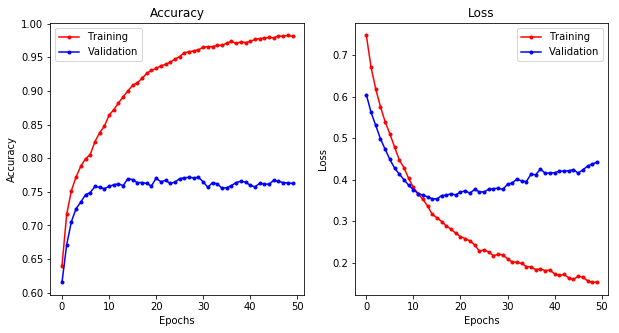

In [6]:
train_acc = [0.6401937046004843, 0.716545601291364, 0.7517352703793382, 0.7722356739305892, 0.7880548829701373, 0.7990314769975787, 0.8053268765133171, 0.8245359160613398, 0.837772397094431, 0.847457627118644, 0.8635996771589992, 0.8721549636803874, 0.8818401937046005, 0.89136400322841, 0.8997578692493947, 0.9083131557707829, 0.9120258272800645, 0.9184826472962067, 0.9260694108151736, 0.930589184826473, 0.9333333333333333, 0.9373688458434221, 0.9393058918482647, 0.9426957223567393, 0.9472154963680387, 0.951089588377724, 0.9567393058918483, 0.9581920903954803, 0.9596448748991122, 0.9610976594027442, 0.9649717514124294, 0.9657788539144472, 0.9657788539144472, 0.9680387409200969, 0.9677158999192897, 0.9709443099273608, 0.9736884584342211, 0.9706214689265537, 0.9728813559322034, 0.971912832929782, 0.9735270379338176, 0.976594027441485, 0.97772397094431, 0.9785310734463277, 0.979499596448749, 0.9788539144471348, 0.9817594834543987, 0.9811138014527845, 0.9825665859564164, 0.9809523809523809]
train_loss = [0.7471876407362358, 0.67059516093729, 0.6179996932486164, 0.5755172054069094, 0.538955046641817, 0.5101182485608154, 0.4783780477718541, 0.44738967526911533, 0.4287007166696615, 0.40268919859517477, 0.3811344269160978, 0.3661255225094217, 0.35277061933610976, 0.3366147295470388, 0.31656876635512965, 0.30824424302606834, 0.2991792884923644, 0.2884376343889906, 0.28043333820222943, 0.2709872191716241, 0.26275040600163213, 0.2580310804599519, 0.25270882412923545, 0.24317157313744805, 0.22819694285916167, 0.23084065317626534, 0.2258011188451276, 0.21690491529315398, 0.2200130958149181, 0.21901576811022294, 0.20970020975144857, 0.201444408779812, 0.2009537965179548, 0.19842949806922283, 0.19074122947704608, 0.18939518959556884, 0.1834789257072652, 0.1851726294225315, 0.1809945208300882, 0.1822016660295445, 0.17321732379405896, 0.1694463233778417, 0.17163030906874294, 0.16402101337885644, 0.1597339614107303, 0.1671494289234437, 0.16549429747248195, 0.1566438622586279, 0.15250067967166817, 0.1534205752084388]
val_acc = [0.6152356358941252, 0.6714009038089089, 0.7056165267914783, 0.7249838605551969, 0.7346675274370562, 0.7456423499031634, 0.7488702388637831, 0.7579083279535184, 0.7566171723692705, 0.7546804389928986, 0.7579083279535184, 0.7604906391220142, 0.7617817947062621, 0.7591994835377663, 0.7695287282117496, 0.7682375726275016, 0.763718528082634, 0.763718528082634, 0.7624273724983861, 0.7585539057456423, 0.7701743060038735, 0.7650096836668818, 0.7669464170432537, 0.7624273724983861, 0.7643641058747579, 0.7695287282117496, 0.7708198837959974, 0.7714654615881213, 0.7708198837959974, 0.7714654615881213, 0.7650096836668818, 0.7566171723692705, 0.763718528082634, 0.7617817947062621, 0.7553260167850226, 0.7559715945771466, 0.7591994835377663, 0.763718528082634, 0.7656552614590059, 0.7643641058747579, 0.7598450613298903, 0.7572627501613944, 0.7624273724983861, 0.7617817947062621, 0.7611362169141381, 0.7669464170432537, 0.7656552614590059, 0.763718528082634, 0.76307295029051, 0.7624273724983861]
val_loss = [0.6043303130979766, 0.5620884599417852, 0.5302520976519107, 0.4981260430512696, 0.47287425647018955, 0.44875098829349447, 0.4277198515144604, 0.4133391690839099, 0.39969041697281726, 0.3864799708685927, 0.37593801747682865, 0.36655171412741316, 0.3626891276657851, 0.358541035898429, 0.3539690712215517, 0.353519695393111, 0.3615272431084231, 0.3629251352196897, 0.36583630710820986, 0.36329522332581804, 0.3699527341485254, 0.3730819247244557, 0.3674360859040063, 0.37625592077370995, 0.37087148670383696, 0.37014130285049424, 0.37684295170148624, 0.3783048002122678, 0.3790680022490571, 0.37661217586927986, 0.38869207812710066, 0.3921059972244051, 0.40115291561289246, 0.3967126180388375, 0.3953101366200395, 0.4131258329589418, 0.4116659636571378, 0.4255180971479324, 0.4153373995621486, 0.41614067554473877, 0.4164840036665262, 0.4204515283572589, 0.42081315560522503, 0.4208938218917748, 0.4243130189053392, 0.4155863709916139, 0.4233617527089325, 0.432378031539486, 0.4373736004817093, 0.4419308500647006]
plot_acc_loss_per_epochs(train_acc, train_loss, val_acc, val_loss)

RDK - L1 regularizer & batch size 16 & lr=0.0001 (`/saved_model/NN_training_history/rdk/l1/batchsize16/5e-05_epochs50_dropout0.3_random.h`)

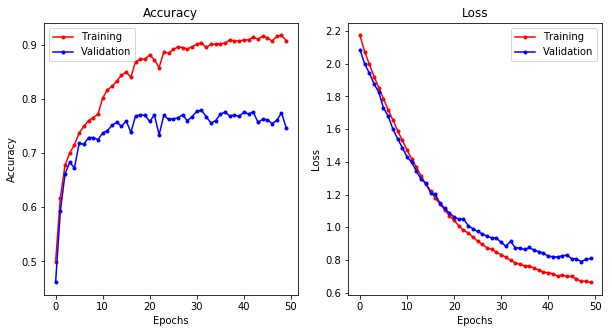

In [9]:
train_acc = [0.4994350282485876, 0.6169491525423729, 0.6779661016949152, 0.7004035512510088, 0.7154156577885391, 0.7373688458434221, 0.7494753833736885, 0.7602905569007264, 0.7659402744148507, 0.7719128329297821, 0.801775625504439, 0.8171105730427765, 0.823728813559322, 0.8332526230831315, 0.8442292171105731, 0.8498789346246973, 0.8405165456012914, 0.869410815173527, 0.8736077481840193, 0.87409200968523, 0.8818401937046005, 0.8724778046811945, 0.858272800645682, 0.8873284907183212, 0.8849071832122679, 0.8916868442292171, 0.8965294592413237, 0.8952380952380953, 0.892816787732042, 0.8966908797417272, 0.9012106537530267, 0.9041162227602906, 0.8953995157384987, 0.9012106537530267, 0.9015334947538337, 0.9026634382566586, 0.9033091202582728, 0.9096045197740112, 0.9076674737691687, 0.9071832122679581, 0.9094430992736078, 0.9094430992736078, 0.914769975786925, 0.9105730427764326, 0.9167070217917676, 0.913317191283293, 0.9073446327683616, 0.9158999192897498, 0.9178369652945925, 0.9083131557707829]
train_loss = [2.174027499082687, 2.0740975291042005, 1.9957340621101558, 1.9215265252303462, 1.8541454256687364, 1.7854311975189714, 1.7180419439457424, 1.6559433684799343, 1.5912517234526689, 1.5317160265016594, 1.4724974510071256, 1.4174442965143432, 1.3680644159263136, 1.3122899630264084, 1.264123546028445, 1.2223370810301675, 1.1773466994244788, 1.1439188250810317, 1.1068914678425823, 1.071783805182136, 1.0418092427857948, 1.0090433312963343, 0.9805983212611866, 0.9657932583606464, 0.9401884463354885, 0.9142024326747805, 0.8952724775833117, 0.8741087996064895, 0.8659271831277688, 0.8459157720027767, 0.8328575838372244, 0.8165054585974095, 0.7972842384096689, 0.7826929314469406, 0.7723723354601302, 0.764722906648391, 0.7623218782492661, 0.7506869707884954, 0.7372422685634714, 0.7263006584792487, 0.7210143416326213, 0.7159780641060091, 0.7013070852935458, 0.707519829369438, 0.699498359516227, 0.6993583492255192, 0.6829590568627149, 0.6693817657362173, 0.6695043207754331, 0.6622350207541237]
val_acc = [0.460942543576501, 0.592640413169787, 0.6617172369270498, 0.6830213040671401, 0.6726920593931569, 0.7178825048418335, 0.7165913492575855, 0.7288573273079406, 0.7288573273079406, 0.7249838605551969, 0.7372498386055519, 0.7417688831504197, 0.7514525500322788, 0.7572627501613944, 0.749515816655907, 0.7598450613298903, 0.7385409941897999, 0.7688831504196255, 0.7708198837959974, 0.7701743060038735, 0.7585539057456423, 0.7708198837959974, 0.7340219496449322, 0.7701743060038735, 0.7624273724983861, 0.76307295029051, 0.7656552614590059, 0.7708198837959974, 0.7598450613298903, 0.7675919948353777, 0.7772756617172369, 0.7792123950936087, 0.7675919948353777, 0.7559715945771466, 0.7598450613298903, 0.7721110393802453, 0.775984506132989, 0.7688831504196255, 0.7701743060038735, 0.7682375726275016, 0.775338928340865, 0.7727566171723693, 0.775984506132989, 0.7572627501613944, 0.7624273724983861, 0.7617817947062621, 0.7546804389928986, 0.7604906391220142, 0.7746933505487411, 0.7469335054874112]
val_loss = [2.0872163983450314, 1.9989993619949606, 1.943331125091937, 1.8768925617555405, 1.8254462043418662, 1.7291852564408443, 1.6800552538089248, 1.6009989205755057, 1.5412151835825152, 1.4873228372490122, 1.430068278789828, 1.3976759775905474, 1.3424015252185375, 1.2935703858165606, 1.268161638541865, 1.2124799888621922, 1.2010657622631016, 1.1476336169658437, 1.1159605559724004, 1.0862521613467655, 1.0635117770318758, 1.0483720813588684, 1.0522414708306822, 1.0097472367939293, 0.9903179830393536, 0.9739566485754053, 0.9589657565329904, 0.9454502162816372, 0.9354306703001704, 0.934224663087058, 0.9067519413339776, 0.8839900201562915, 0.9137617407343787, 0.8757640940285714, 0.8718598462674909, 0.864013730517659, 0.8760639203218124, 0.8596740535492279, 0.8508874199866017, 0.8426434937179127, 0.8220274446470803, 0.8203935478101475, 0.8176238550687314, 0.8259155086119611, 0.8286781778945086, 0.8081731511901624, 0.8059400544003412, 0.7902698578028005, 0.8028936908274331, 0.80931141074047]
plot_acc_loss_per_epochs(train_acc, train_loss, val_acc, val_loss)

RDK - No regularizer & batch size 16 & lr=0.0001 (`./saved_model/NN_training_history/rdk/None/batchsize16/0.0_epochs50_dropout0.3_lr0.0001_random_2.h`) 

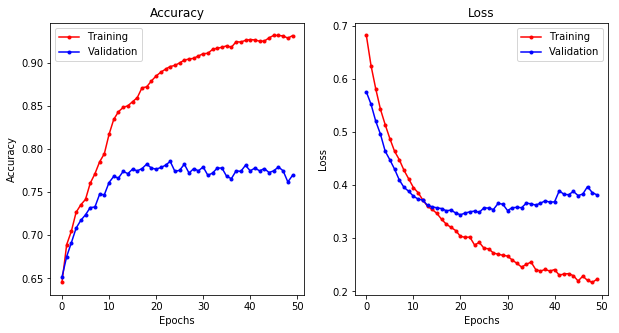

In [8]:
train_acc = [0.6451977401129944, 0.6891041162227602, 0.7047619047619048, 0.7265536723163842, 0.735270379338176, 0.7415657788539144, 0.7602905569007264, 0.7712671509281679, 0.7851493139628732, 0.7945117029862793, 0.8169491525423729, 0.8343825665859564, 0.8432606941081517, 0.8482647296206618, 0.8502017756255045, 0.8548829701372074, 0.8595641646489104, 0.8710250201775626, 0.8721549636803874, 0.8789346246973365, 0.8847457627118644, 0.8891041162227603, 0.8926553672316384, 0.8957223567393059, 0.8970137207425343, 0.8999192897497982, 0.9031476997578692, 0.9044390637610976, 0.9052461662631154, 0.9079903147699758, 0.9105730427764326, 0.9110573042776433, 0.9155770782889427, 0.9170298627925747, 0.9179983857949959, 0.919774011299435, 0.9179983857949959, 0.924455205811138, 0.9241323648103309, 0.9260694108151736, 0.9270379338175948, 0.9265536723163842, 0.9251008878127522, 0.9252623083131558, 0.9289749798224375, 0.9318805488297014, 0.9317191283292978, 0.9312348668280872, 0.9286521388216303, 0.9315577078288942]
train_loss = [0.6814993283746702, 0.6244295304104434, 0.5809406455146199, 0.5424436165547544, 0.5137530697652464, 0.48732463321539543, 0.4636082505390854, 0.4478660494546144, 0.42784427631469, 0.41176321815347555, 0.39543845385577625, 0.38571923075903797, 0.3721068385342035, 0.36010243399572334, 0.3541765721696726, 0.34669354845190165, 0.33561195515162334, 0.3264700710220237, 0.32044610910544574, 0.31450792356207063, 0.3035113046590699, 0.3019500583819173, 0.30216080619020746, 0.28740573105935224, 0.29225616629225676, 0.28139775038920073, 0.2801609156495434, 0.27235797492605335, 0.27002312049834937, 0.26813320259686146, 0.266545881832483, 0.2592169969287777, 0.25283511947055703, 0.24585187410615547, 0.2510040792223905, 0.25529113063608283, 0.24122320122060706, 0.23837420657289135, 0.2414562141226606, 0.2383582263812122, 0.24119324214618182, 0.23063605832322362, 0.23293331281805923, 0.23349691258504374, 0.229697613917213, 0.21971846726798935, 0.22884010621094722, 0.22081831497372495, 0.21698135961150816, 0.22301931776304798]
val_acc = [0.6513879922530665, 0.6752743705616526, 0.6914138153647514, 0.7081988379599742, 0.7172369270497095, 0.723692704970949, 0.7320852162685604, 0.7327307940606843, 0.7475790832795352, 0.7469335054874112, 0.7611362169141381, 0.7682375726275016, 0.7663008392511298, 0.7740477727566172, 0.7714654615881213, 0.776630083925113, 0.7746933505487411, 0.7772756617172369, 0.7824402840542285, 0.7779212395093609, 0.776630083925113, 0.7785668173014848, 0.7811491284699806, 0.7856681730148483, 0.7740477727566172, 0.775338928340865, 0.7824402840542285, 0.7721110393802453, 0.7772756617172369, 0.7746933505487411, 0.7792123950936087, 0.7695287282117496, 0.7721110393802453, 0.7779212395093609, 0.7779212395093609, 0.7682375726275016, 0.7656552614590059, 0.7746933505487411, 0.7740477727566172, 0.7811491284699806, 0.7746933505487411, 0.7779212395093609, 0.7746933505487411, 0.7772756617172369, 0.7727566171723693, 0.7746933505487411, 0.7792123950936087, 0.7746933505487411, 0.7617817947062621, 0.7695287282117496]
val_loss = [0.5751987344761523, 0.5519135143773798, 0.5200315092439571, 0.49570829984524545, 0.4638211313488408, 0.4474810258737297, 0.42997019413288673, 0.4097112923995228, 0.39570739799888, 0.38840400805159336, 0.379116857278878, 0.37376896853289965, 0.3718201611756201, 0.36185383708189195, 0.35925112629106076, 0.35719291643606915, 0.3559172627539539, 0.3517515217973156, 0.35304526035211564, 0.3474750364688691, 0.34420513464143926, 0.34749072757438354, 0.3497618844310571, 0.3511675335923805, 0.3487167174466738, 0.35729706795312577, 0.3567825376487225, 0.35405973434986954, 0.3655234267820921, 0.3641180291993146, 0.352200593503542, 0.35746205649582163, 0.3581781785783651, 0.35758957768964184, 0.3660954773195179, 0.3648147457276259, 0.3624173671372711, 0.3659635835535839, 0.37043754401477863, 0.3679234301605249, 0.36851877578232967, 0.3893660174753683, 0.38252596727411853, 0.38196044750487596, 0.38807812465861047, 0.3803221149895559, 0.38316151243859986, 0.39709154448638506, 0.38602786680973294, 0.3816397070038157]
plot_acc_loss_per_epochs(train_acc, train_loss, val_acc, val_loss)

Simple NN (batch size 16 & dropout 0.3 & epochs 20)

In [10]:
nn_traintest = pd.read_csv("./results/nn_traintest_output.txt", skiprows=1)

In [12]:
# MicroAUC
r = [i for idx, i in enumerate(nn_traintest['lambda']) if nn_traintest['Ft'][idx] == 'ecfp' and nn_traintest['Regularizer'][idx] == 'l1']

l1_ecfp_train = [i for idx, i in enumerate(nn_traintest['TrainScore']) if nn_traintest['Ft'][idx] == 'ecfp' and nn_traintest['Regularizer'][idx] == 'l1']
l2_ecfp_train = [i for idx, i in enumerate(nn_traintest['TrainScore']) if nn_traintest['Ft'][idx] == 'ecfp' and nn_traintest['Regularizer'][idx] == 'l2']
l1l2_ecfp_train = [i for idx, i in enumerate(nn_traintest['TrainScore']) if nn_traintest['Ft'][idx] == 'ecfp' and nn_traintest['Regularizer'][idx] == 'l1_l2']
l1_ecfp_test = [i for idx, i in enumerate(nn_traintest['TestScore']) if nn_traintest['Ft'][idx] == 'ecfp' and nn_traintest['Regularizer'][idx] == 'l1']
l2_ecfp_test = [i for idx, i in enumerate(nn_traintest['TestScore']) if nn_traintest['Ft'][idx] == 'ecfp' and nn_traintest['Regularizer'][idx] == 'l2']
l1l2_ecfp_test = [i for idx, i in enumerate(nn_traintest['TestScore']) if nn_traintest['Ft'][idx] == 'ecfp' and nn_traintest['Regularizer'][idx] == 'l1_l2']

l1_rdk_train = [i for idx, i in enumerate(nn_traintest['TrainScore']) if nn_traintest['Ft'][idx] == 'rdk' and nn_traintest['Regularizer'][idx] == 'l1']
l2_rdk_train = [i for idx, i in enumerate(nn_traintest['TrainScore']) if nn_traintest['Ft'][idx] == 'rdk' and nn_traintest['Regularizer'][idx] == 'l2']
l1l2_rdk_train = [i for idx, i in enumerate(nn_traintest['TrainScore']) if nn_traintest['Ft'][idx] == 'rdk' and nn_traintest['Regularizer'][idx] == 'l1_l2']
l1_rdk_test = [i for idx, i in enumerate(nn_traintest['TestScore']) if nn_traintest['Ft'][idx] == 'rdk' and nn_traintest['Regularizer'][idx] == 'l1']
l2_rdk_test = [i for idx, i in enumerate(nn_traintest['TestScore']) if nn_traintest['Ft'][idx] == 'rdk' and nn_traintest['Regularizer'][idx] == 'l2']
l1l2_rdk_test = [i for idx, i in enumerate(nn_traintest['TestScore']) if nn_traintest['Ft'][idx] == 'rdk' and nn_traintest['Regularizer'][idx] == 'l1_l2']

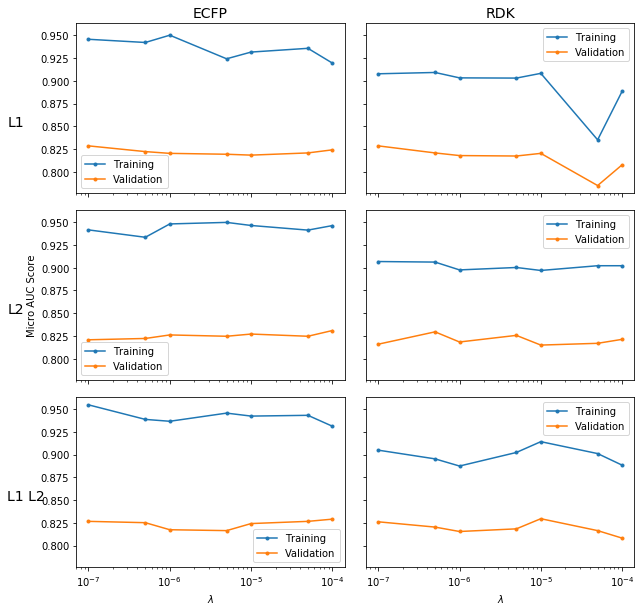

In [15]:
fig, ax = plt.subplots(3, 2, sharex=True, sharey=True)

ax[0,0].set_title("ECFP", fontsize=14)
ax[0,1].set_title("RDK", fontsize=14)

ax[0,0].semilogx(r, l1_ecfp_train, label='Training', marker='.')
ax[0,0].semilogx(r, l1_ecfp_test, label='Validation', marker='.')
ax[1,0].semilogx(r, l2_ecfp_train, label='Training', marker='.')
ax[1,0].semilogx(r, l2_ecfp_test, label='Validation', marker='.')
ax[2,0].semilogx(r, l1l2_ecfp_train, label='Training', marker='.')
ax[2,0].semilogx(r, l1l2_ecfp_test, label='Validation', marker='.')

ax[0,1].semilogx(r, l1_rdk_train, label='Training', marker='.')
ax[0,1].semilogx(r, l1_rdk_test, label='Validation', marker='.')
ax[1,1].semilogx(r, l2_rdk_train, label='Training', marker='.')
ax[1,1].semilogx(r, l2_rdk_test, label='Validation', marker='.')
ax[2,1].semilogx(r, l1l2_rdk_train, label='Training', marker='.')
ax[2,1].semilogx(r, l1l2_rdk_test, label='Validation', marker='.')

ax[1,0].set_ylabel("Micro AUC Score")
ax[2,0].set_xlabel("$\lambda$")
ax[2,1].set_xlabel("$\lambda$")

ax[0,0].text(1E-8, 0.85, "L1", fontsize=14)
ax[1,0].text(1E-8, 0.85, "L2", fontsize=14)
ax[2,0].text(1E-8, 0.85, "L1 L2", fontsize=14)

ax[0,0].legend()
ax[1,0].legend()
ax[2,0].legend()
ax[0,1].legend()
ax[1,1].legend()
ax[2,1].legend()

fig.set_size_inches((10, 10))
fig.subplots_adjust(wspace=0.08, hspace=0.1)

KNearestNeighbors

In [16]:
knn_output = pd.read_csv("./results/knn_output.txt")

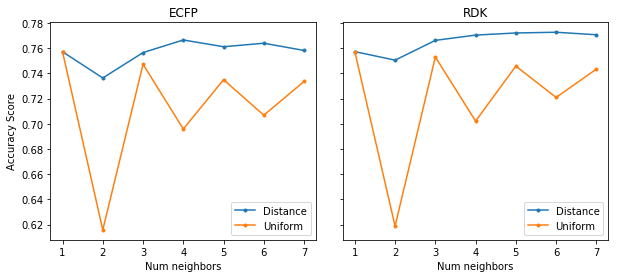

In [17]:
metrics = 'Accuracy'

nn = [1, 2, 3, 4, 5, 6, 7]

ecfp_distance = [i for idx, i in enumerate(knn_output[metrics]) if knn_output['Ft'][idx] == 'ecfp' and knn_output['weights'][idx] == 'distance']
ecfp_uniform = [i for idx, i in enumerate(knn_output[metrics]) if knn_output['Ft'][idx] == 'ecfp' and knn_output['weights'][idx] == 'uniform']

rdk_distance = [i for idx, i in enumerate(knn_output[metrics]) if knn_output['Ft'][idx] == 'rdk' and knn_output['weights'][idx] == 'distance']
rdk_uniform = [i for idx, i in enumerate(knn_output[metrics]) if knn_output['Ft'][idx] == 'rdk' and knn_output['weights'][idx] == 'uniform']


fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

ax1.plot(nn, ecfp_distance, label='Distance', marker='.')
ax1.plot(nn, ecfp_uniform, label='Uniform', marker='.')
ax2.plot(nn, rdk_distance, label='Distance', marker='.')
ax2.plot(nn, rdk_uniform, label='Uniform', marker='.')

ax1.set_title('ECFP')
ax2.set_title('RDK')
ax1.legend()
ax2.legend()
ax1.set_xlabel("Num neighbors")
ax2.set_xlabel("Num neighbors")
ax1.set_ylabel("Accuracy Score")

fig.set_size_inches((10, 4))
fig.subplots_adjust(wspace=0.1)

GradientBoosting

In [41]:
gb_output = pd.read_csv("./results/gb_output.txt")

In [42]:
metrics = 'MicroAUC'
maxft = 'sqrt'

lr = np.array([0.2, 0.5, 0.8])

ecfp_200trees = [i for idx, i in enumerate(gb_output[metrics]) if gb_output['Ft'][idx] == 'ecfp' and gb_output['NumTrees'][idx] == 200 and gb_output['MaxFt'][idx] == maxft]
ecfp_500trees = [i for idx, i in enumerate(gb_output[metrics]) if gb_output['Ft'][idx] == 'ecfp' and gb_output['NumTrees'][idx] == 500 and gb_output['MaxFt'][idx] == maxft]

rdk_200trees = [i for idx, i in enumerate(gb_output[metrics]) if gb_output['Ft'][idx] == 'rdk' and gb_output['NumTrees'][idx] == 200 and gb_output['MaxFt'][idx] == maxft]
rdk_500trees = [i for idx, i in enumerate(gb_output[metrics]) if gb_output['Ft'][idx] == 'rdk' and gb_output['NumTrees'][idx] == 500 and gb_output['MaxFt'][idx] == maxft]

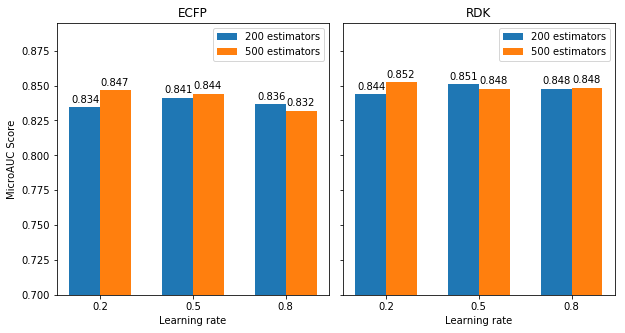

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
width = 0.1
rects1 = ax1.bar(lr - width/2, ecfp_200trees, width, align='center', label='200 estimators')
rects2 = ax1.bar(lr + width/2, ecfp_500trees, width, align='center', label='500 estimators')

rects3 = ax2.bar(lr - width/2, rdk_200trees, width, align='center', label='200 estimators')
rects4 = ax2.bar(lr + width/2, rdk_500trees, width, align='center', label='500 estimators')

ax1.set_title("ECFP")
ax2.set_title("RDK")
ax1.legend()
ax2.legend()

ax1.set_xticks(lr)
ax2.set_xticks(lr)
ax1.set_ylim([0.7, None])
ax1.set_ylabel("%s Score" %metrics)
ax1.set_xlabel("Learning rate")
ax2.set_xlabel("Learning rate")

def autolabel_ax1(rects, xpos='center'):
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('%.3f' %height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*-15, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')
def autolabel_ax2(rects, xpos='center'):
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}
    for rect in rects:
        height = rect.get_height()
        ax2.annotate('%.3f' %height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*-15, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel_ax1(rects1, "left")
autolabel_ax1(rects2, "right")
autolabel_ax2(rects3, "left")
autolabel_ax2(rects4, "right")

fig.set_size_inches((10, 5))
fig.subplots_adjust(wspace=0.05)

RandomForest

In [62]:
rf_output = pd.read_csv("./results/rf_output.txt")

In [63]:
metrics = 'MicroAUC'
maxft = 'None'

depth = np.array([2, 3, 4, 5])

ecfp_200trees = [i for idx, i in enumerate(rf_output[metrics]) if rf_output['Ft'][idx] == 'ecfp' and rf_output['NumTrees'][idx] == 200 and rf_output['MaxFt'][idx] == maxft]
ecfp_500trees = [i for idx, i in enumerate(rf_output[metrics]) if rf_output['Ft'][idx] == 'ecfp' and rf_output['NumTrees'][idx] == 500 and rf_output['MaxFt'][idx] == maxft]

rdk_200trees = [i for idx, i in enumerate(rf_output[metrics]) if rf_output['Ft'][idx] == 'rdk' and rf_output['NumTrees'][idx] == 200 and rf_output['MaxFt'][idx] == maxft]
rdk_500trees = [i for idx, i in enumerate(rf_output[metrics]) if rf_output['Ft'][idx] == 'rdk' and rf_output['NumTrees'][idx] == 500 and rf_output['MaxFt'][idx] == maxft]

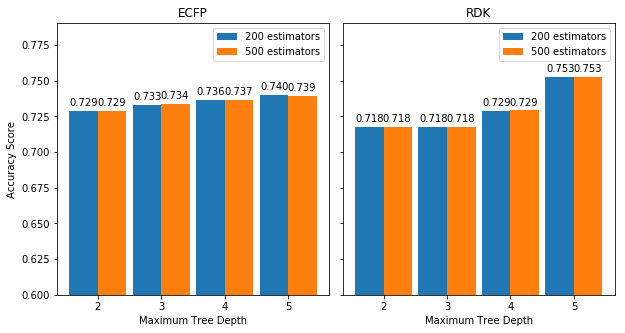

In [160]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
width = 0.45
rects1 = ax1.bar(depth - width/2, ecfp_200trees, width, align='center', label='200 estimators')
rects2 = ax1.bar(depth + width/2, ecfp_500trees, width, align='center', label='500 estimators')

rects3 = ax2.bar(depth - width/2, rdk_200trees, width, align='center', label='200 estimators')
rects4 = ax2.bar(depth + width/2, rdk_500trees, width, align='center', label='500 estimators')

ax1.set_title("ECFP")
ax2.set_title("RDK")
ax1.legend()
ax2.legend()

ax1.set_xticks(depth)
ax2.set_xticks(depth)
ax1.set_ylim([0.6, None])
ax1.set_ylabel("%s Score" %metrics)
ax1.set_xlabel("Maximum Tree Depth")
ax2.set_xlabel("Maximum Tree Depth")

def autolabel_ax1(rects, xpos='center'):
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('%.3f' %height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*-15, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')
def autolabel_ax2(rects, xpos='center'):
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}
    for rect in rects:
        height = rect.get_height()
        ax2.annotate('%.3f' %height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*-15, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel_ax1(rects1, "left")
autolabel_ax1(rects2, "right")
autolabel_ax2(rects3, "left")
autolabel_ax2(rects4, "right")

fig.set_size_inches((10, 5))
fig.subplots_adjust(wspace=0.05)

Overall results - pick the 4 best models and test on testing set

In [141]:
metrics = 'Accuracy'

x = np.array([2, 1, 0])
label = ['train', 'val', 'test']

# random split
rf_ecfp_random = np.array([0.629475383, 0.627566, 0.625])
rf_rdk_random = np.array([0.62511703, 0.625629, 0.6136363636363636])

# gb_ecfp_random = np.array([, , 0.7128099173553719])
# gb_rdk_random = np.array([, , 0.7381198347107438])

knn_ecfp_random = np.array([0.989717514, 0.756488, 0.7634297520661157])
knn_rdk_random = np.array([0.988410008, 0.766172, 0.7716942148760331])

nn_ecfp_random = np.array([0.9228410008071025, 0.763073, 0.7804752066115702])
nn_rdk_random = np.array([0.8789346246973365, 0.761136, 0.7737603305785123])

# scaffold split
rf_ecfp_scaffold = np.array([0.632800646, 0.630536, 0.6265495867768595])
rf_rdk_scaffold = np.array([0.634737692, 0.630665, 0.6244834710743802])

gb_ecfp_scaffold = np.array([0.950895884, 0.800065, 0.5841942148760331])
# gb_rdk_scaffold = np.array([, , 0.6017561983471075])

knn_ecfp_scaffold = np.array([0.986715093, 0.791995, 0.6058884297520661])
knn_rdk_scaffold = np.array([0.983954802, 0.795610, 0.6317148760330579])

nn_ecfp_scaffold = np.array([0.9292978208232445, 0.780504, 0.6534090909090909])
nn_rdk_scaffold = np.array([0.875867635189669, 0.777921, 0.65650826446281])

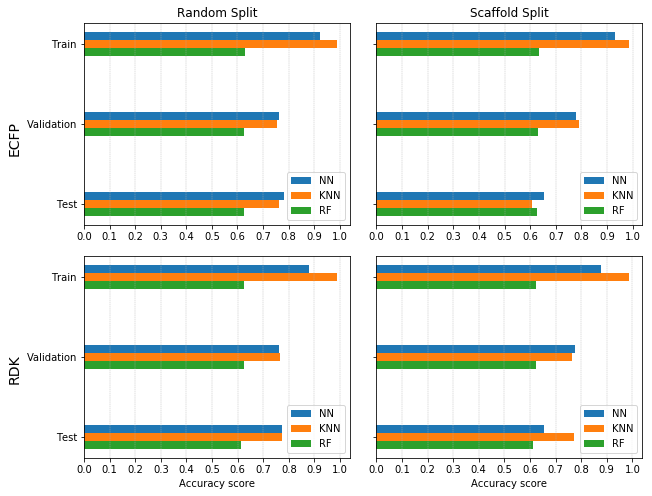

In [184]:
fig, ax = plt.subplots(2, 2, sharey=True)

ax1, ax2, ax3, ax4 = ax[0,0], ax[0,1], ax[1,0], ax[1,1]

ax1.set_title("Random Split")
ax2.set_title("Scaffold Split")

width = 0.1

ax1.set_yticks(x)
ax1.set_yticklabels(["Train", "Validation", "Test"])
ax1.barh(x+width, nn_ecfp_random, width, label='NN')
ax1.barh(x, knn_ecfp_random, width, label='KNN')
ax1.barh(x-width, rf_ecfp_random, width, label='RF')
ax1.text(-0.3, 0.9, "ECFP", fontsize=14, rotation=90)
ax1.legend()

ax2.set_yticks(x)
ax2.set_yticklabels(["Train", "Validation", "Test"])
ax2.barh(x+width, nn_ecfp_scaffold, width, label='NN')
ax2.barh(x, knn_ecfp_scaffold, width, label='KNN')
ax2.barh(x-width, rf_ecfp_scaffold, width, label='RF')
ax2.legend()

ax3.set_yticks(x)
ax3.set_yticklabels(["Train", "Validation", "Test"])
ax3.barh(x+width, nn_rdk_random, width, label='NN')
ax3.barh(x, knn_rdk_random, width, label='KNN')
ax3.barh(x-width, rf_rdk_random, width, label='RF')
ax3.text(-0.3, 0.9, "RDK", fontsize=14, rotation=90)
ax3.legend()

ax4.set_yticks(x)
ax4.set_yticklabels(["Train", "Validation", "Test"])
ax4.barh(x+width, nn_rdk_scaffold, width, label='NN')
ax4.barh(x, knn_rdk_random, width, label='KNN')
ax4.barh(x-width, rf_rdk_random, width, label='RF')
ax4.legend()

ax1.grid(True, axis='x', linestyle='--', linewidth=0.4)
ax2.grid(True, axis='x', linestyle='--', linewidth=0.4)
ax3.grid(True, axis='x', linestyle='--', linewidth=0.4)
ax4.grid(True, axis='x', linestyle='--', linewidth=0.4)

ax1.set_xticks(np.linspace(0, 1, 11))
ax2.set_xticks(np.linspace(0, 1, 11))
ax3.set_xticks(np.linspace(0, 1, 11))
ax4.set_xticks(np.linspace(0, 1, 11))

ax3.set_xlabel("%s score" %metrics)
ax4.set_xlabel("%s score" %metrics)

fig.set_size_inches((10, 8))
fig.subplots_adjust(wspace=0.1, hspace=0.15)